## Data Visualization

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from nose.tools import assert_equal
from IPython.display import display_svg

### Problem 1. Life Expectancy World Map

In [24]:
s = requests.get("https://raw.githubusercontent.com/UI-DataScience/info490-fa16/master/Week14/assignments/data/life_expectancy.svg")
sample = s.content 

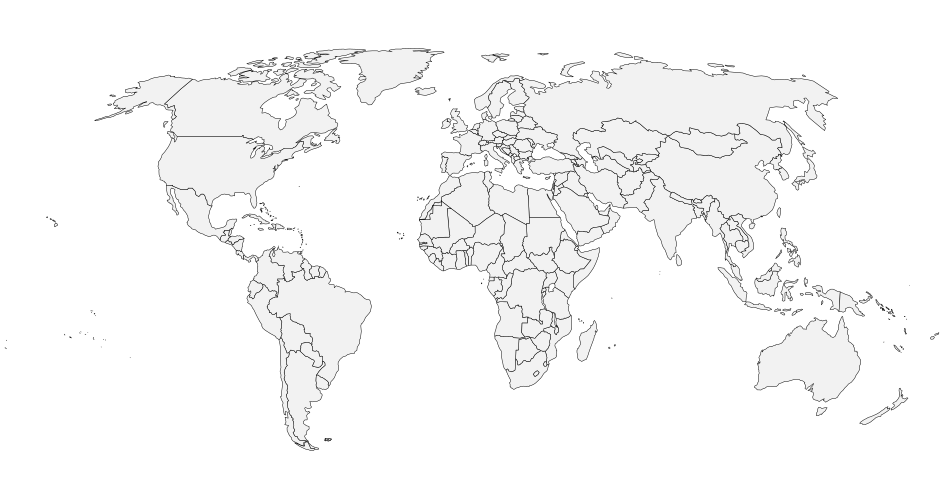

In [3]:
# Empty world map with ISO codes from: http://simplemaps.com/resources/svg-world
w = requests.get("https://raw.githubusercontent.com/UI-DataScience/info490-fa16/master/Week14/assignments/data/world.svg")
world = w.content 
display_svg(world, raw=True)

In [4]:
countries = pd.read_csv('countries.csv', sep=';', usecols=['Country (en)', 'Country code', 'Life expectancy'], 
                        index_col='Country code')
print(countries[:10])

                Country (en)  Life expectancy
Country code                                 
AF               Afghanistan             50.9
EG                     Egypt             73.7
AX             Åland Islands              0.0
AL                   Albania             78.1
DZ                   Algeria             76.6
AS            American Samoa             75.1
AD                   Andorra             82.7
AO                    Angola             55.6
AI                  Anguilla             81.3
AQ                Antarctica              0.0


In [5]:
soup = BeautifulSoup(world, "xml")

In [6]:
colors = ['#ffffcc', '#d9f0a3', '#addd8e', '#78c679', '#31a354', '#006837']

In [7]:
paths=soup.findAll('path')

for p in paths:
    try:
        rate = countries['Life expectancy'][p['id']]
    except:
        continue
    
    if rate>80:
        color_class = 5
    elif rate>70:
        color_class = 4
    elif rate>60:
        color_class = 3
    elif rate>50:
        color_class = 2
    elif rate>40:
        color_class = 1
    else:
        color_class = 0
    
    color = colors[color_class]
    p['style'] = 'fill:{};fill-rule:evenodd'.format(color)

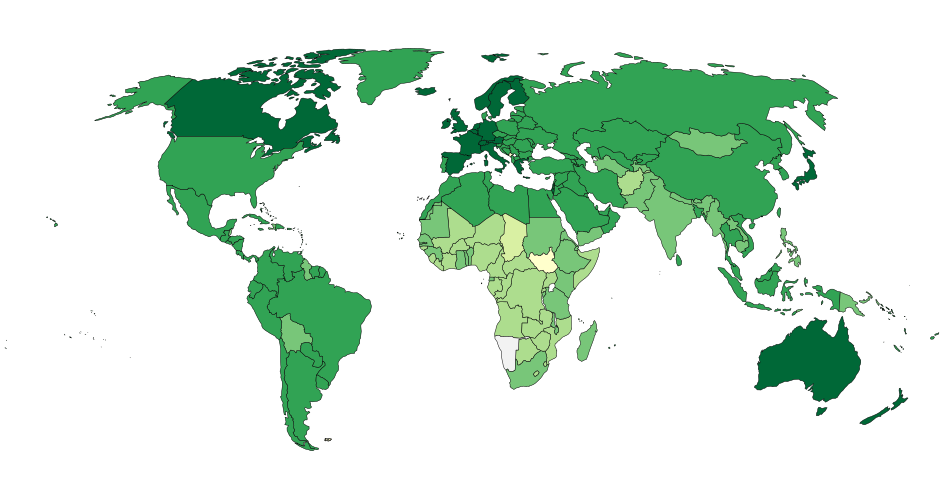

In [8]:
life_expectancy = soup.prettify()
display_svg(life_expectancy, raw=True)

In [9]:
# assertion tests
assert_equal(soup.find('path', id='CN')['style'][5:12], colors[4])
assert_equal(soup.find('path', id='US')['style'][5:12], colors[4])
assert_equal(soup.find('path', id='CA')['style'][5:12], colors[5])
assert_equal(soup.find('path', id='NG')['style'][5:12], colors[2])

### Problem 2. 2016 USA Presidental Election Map

In [73]:
e = requests.get("https://raw.githubusercontent.com/UI-DataScience/info490-fa16/master/Week14/assignments/data/election2016.svg")
e2016 = e.content

In [25]:
u = requests.get("https://raw.githubusercontent.com/UI-DataScience/info490-fa16/master/Week14/assignments/data/usa.svg")
usa = u.content 

In [28]:
votes = pd.read_csv('ElectoralCollege2016.csv', index_col='State')
print(votes[:10])

       ElectoralVotes  WhoWon?
State                         
AK                  3    Trump
AL                  9    Trump
AR                 10    Trump
AZ                 11    Trump
CA                 55  Clinton
CO                  9  Clinton
CT                  7  Clinton
DC                  3  Clinton
DE                  3  Clinton
FL                 29    Trump


In [29]:
print(votes[21:23])

       ElectoralVotes  WhoWon?
State                         
ME                  3  Clinton
ME-2                1    Trump


In [85]:
dem = '#698dc5' 
rep = '#f07763' 

In [31]:
another_soup = BeautifulSoup(usa, "xml")

In [37]:
another_soup.find('path', id='IL')

<path d="M617.8,301.5v-3.6l0.3-4.9l2.4-3.1l1.8-3.8l2.6-3.9l-0.4-5.3l-2-3.5l-0.1-3.3l0.7-5.3l-0.8-7.2 l-1.1-15.8l-1.3-15l-0.9-11.6l-0.3-0.9l-0.8-2.6l-1.3-3.7l-1.6-1.8l-1.5-2.6l-0.2-5.5l-9.9,1.3l-27.2,1.7l-8.7-0.4l0.2,2.4l2.3,0.7 l0.9,1.1l0.5,1.8l3.9,3.4l0.7,2.3l-0.7,3.4l-1.8,3.7l-0.7,2.5l-2.3,1.8l-1.8,0.7l-5.3,1.4l-0.7,1.8L562,230l0.7,1.4l1.8,1.6 l-0.2,4.1l-1.8,1.6l-0.7,1.6v2.7l-1.8,0.5l-1.6,1.1l-0.2,1.4l0.2,2.1l-1.7,1.3l-1,2.8l0.5,3.7l2.3,7.3l7.3,7.5l5.5,3.7l-0.2,4.3 l0.9,1.4l6.4,0.5l2.7,1.4l-0.7,3.7l-2.3,5.9l-0.7,3.2l2.3,3.9l6.4,5.3l4.6,0.7l2.1,5l2.1,3.2l-0.9,3l1.6,4.1l1.8,2.1l1.9-0.8 l0.7-2.2l2-1.4l3.2-1.1l3.1,1.2l2.9,1.1l0.8-0.2l-0.1-1.2l-1.1-2.8l0.4-2.4l2.3-1.6l2.4-1l1.2-0.4l-0.6-1.3l-0.8-2.2l1.2-1.3 L617.8,301.5z" fill="#D3D3D3" id="IL"/>

In [86]:
another_soup.find('circle')['fill']=rep
paths1 = another_soup.findAll('path')
for p in paths1:
    try:
        result = votes['WhoWon?'][p['id']]
    except:
        continue
    
    if result=='Clinton':
        p['fill']=dem
    elif result=='Trump':
        p['fill']=rep

texts=another_soup.findAll('text')
for t in texts:
    try:
        t.string = str(votes['ElectoralVotes'][t['id']])
    except:
        continue


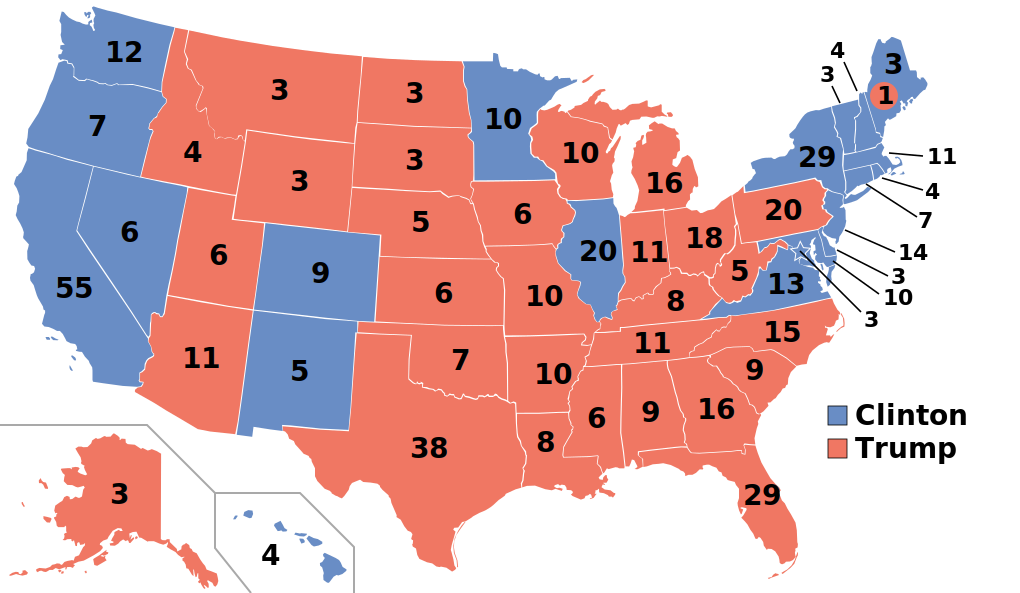

In [87]:
election = another_soup.prettify()
display_svg(election, raw=True)

In [88]:
# assertion test on tags
assert_equal(another_soup.find('path', id='CA')['fill'], dem)
assert_equal(another_soup.find('path', id='IL')['fill'], dem)
assert_equal(another_soup.find('path', id='FL')['fill'], rep)
assert_equal(another_soup.find('path', id='OH')['fill'], rep)

assert_equal(another_soup.find('text', id='CA').string, '55')
assert_equal(another_soup.find('text', id='IL').string, '20')
assert_equal(another_soup.find('text', id='FL').string, '29')
assert_equal(another_soup.find('text', id='ME-2').string, '1')

assert_equal(str(another_soup.find("circle")), '<circle cx="884" cy="96" fill="#f07763" id="ME-2" r="14"/>')

In [89]:
# assertion tests on the entire svg
p2answer = BeautifulSoup(e2016, "xml")
assert_equal(election, p2answer.prettify())